In [14]:
import scripts.collection as Collection

In [15]:
Collection.get_data(10000, timeframe="H1", symbol="XAUUSD", name="gold")

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv("data/gold_H1.csv")
df.drop(columns=["time", "spread", "real_volume"], inplace=True)
df["dev"] = df.high - df.low
df

,open,high,low,close,tick_volume,dev
0,1796.20,1796.89,1793.18,1793.66,1512,3.71
1,1793.67,1794.55,1793.39,1793.92,546,1.16
2,1795.12,1795.67,1794.84,1795.29,601,0.83
3,1795.38,1795.76,1794.67,1795.67,487,1.09
4,1795.67,1798.79,1795.40,1798.38,818,3.39
...,...,...,...,...,...,...
9995,1975.41,1978.16,1975.19,1977.47,4021,2.97
9996,1977.47,1978.95,1976.60,1977.06,3557,2.35
9997,1977.06,1977.07,1973.80,1974.16,4207,3.27
9998,1974.17,1975.44,1966.25,1967.08,11256,9.19


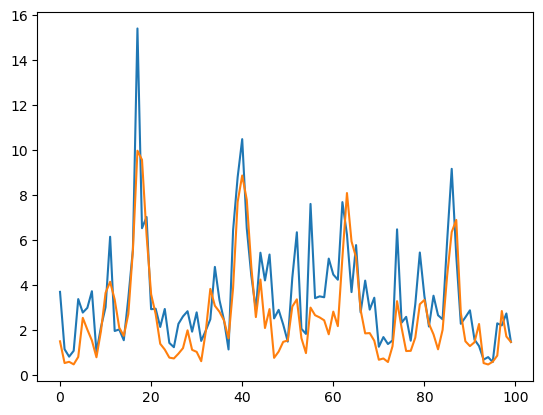

In [18]:
plt.plot(df.dev[:100])
plt.plot(df.tick_volume[:100]/1000)


In [25]:
close = df.close

features = []
labels = []
for i in range(20, len(close)):
    features.append(close[i-20:i])
    labels.append(close[i])

features = np.array(features)
labels = np.array(labels).reshape(-1, 1)
features.shape, labels.shape

((9980, 20), (9980, 1))

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
features = scaler.fit_transform(features).reshape(len(features), -1, 1)
labels = scaler.fit_transform(labels)

labels[:10], labels.shape, features.shape

(array([[0.38500453],
        [0.3878101 ],
        [0.38593236],
        [0.38003402],
        [0.38129322],
        [0.38268496],
        [0.38456271],
        [0.38215477],
        [0.38049793],
        [0.38195595]]),
 (9980, 1),
 (9980, 20, 1))

In [27]:
np.save("data/x0", features[:9000])
np.save("data/y0", labels[:9000])
np.save("data/x1", features[9000:])
np.save("data/y1", labels[9000:])